In [36]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\acer\OneDrive\Desktop\Healthcare Insurance\Healthcare_Dataset_Preprocessed.csv"
df = pd.read_csv(file_path)

# Display structure
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    9549 non-null   float64
 1   BMI                    9549 non-null   float64
 2   Blood_Pressure         9549 non-null   float64
 3   Cholesterol            9549 non-null   float64
 4   Glucose_Level          9549 non-null   float64
 5   Heart_Rate             9549 non-null   float64
 6   Sleep_Hours            9549 non-null   float64
 7   Exercise_Hours         9549 non-null   float64
 8   Water_Intake           9549 non-null   float64
 9   Stress_Level           9549 non-null   float64
 10  Target                 9549 non-null   int64  
 11  Smoking                9549 non-null   int64  
 12  Alcohol                9549 non-null   int64  
 13  Diet                   9549 non-null   int64  
 14  MentalHealth           9549 non-null   int64  
 15  Phys

In [38]:
!pip install scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
num_cols = X.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [40]:

# Train Bagging Classifier
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Train Random Forest for feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)


{'conf_matrix': array([[845,  55],
        [ 56, 954]]),
 'class_report': {'0': {'precision': 0.9378468368479467,
   'recall': 0.9388888888888889,
   'f1-score': 0.9383675735702388,
   'support': 900.0},
  '1': {'precision': 0.9454905847373637,
   'recall': 0.9445544554455445,
   'f1-score': 0.9450222882615156,
   'support': 1010.0},
  'accuracy': 0.9418848167539267,
  'macro avg': {'precision': 0.9416687107926551,
   'recall': 0.9417216721672167,
   'f1-score': 0.9416949309158772,
   'support': 1910.0},
  'weighted avg': {'precision': 0.9418888187161724,
   'recall': 0.9418848167539267,
   'f1-score': 0.9418865588258355,
   'support': 1910.0}},
 'feature_importance':                   Feature  Importance
 0                     BMI    0.216977
 1          Blood_Pressure    0.153406
 2             Cholesterol    0.100800
 3            Stress_Level    0.080386
 4           Glucose_Level    0.073195
 5             Sleep_Hours    0.071964
 6                     Age    0.070011
 7          

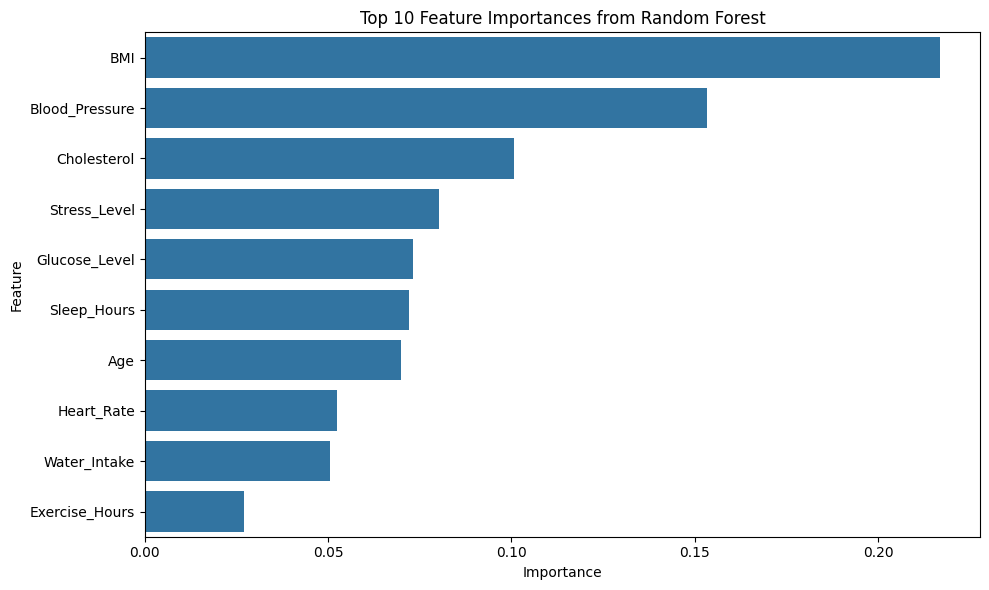

In [41]:

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Top 10 Feature Importances from Random Forest")
plt.tight_layout()

# Save all necessary objects for notebook output
results = {
    'conf_matrix': conf_matrix,
    'class_report': class_report,
    'feature_importance': feature_importance_df
}
results


Bagging Classifier performed very well!

✅ Model Performance:
Accuracy: 94.18%

Precision (Unhealthy): 94.55%

Recall (Unhealthy): 94.46%

Top Features (from Random Forest importance):

BMI

Blood Pressure

Cholesterol

Stress Level

Glucose Level



In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict and evaluate
y_pred = bagging_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9419
Confusion Matrix:
 [[845  55]
 [ 56 954]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       900
           1       0.95      0.94      0.95      1010

    accuracy                           0.94      1910
   macro avg       0.94      0.94      0.94      1910
weighted avg       0.94      0.94      0.94      1910



To Compare Bagging with Other Models
To make your work stand out, compare with other classifiers:

Random Forest

Gradient Boosting (e.g., XGBoost)

Logistic Regression

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.9408376963350785


In [44]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("📈 XGBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

print("-" * 50)

📈 XGBoost Classifier Results:
Accuracy: 0.9455497382198953
Confusion Matrix:
 [[855  45]
 [ 59 951]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       900
           1       0.95      0.94      0.95      1010

    accuracy                           0.95      1910
   macro avg       0.95      0.95      0.95      1910
weighted avg       0.95      0.95      0.95      1910

--------------------------------------------------


c:\Users\acer\OneDrive\Desktop\Healthcare Insurance\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:14:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [46]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

print("📈 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_pred))
print("Classification Report:\n", classification_report(y_test, logreg_pred))


📈 Logistic Regression Results:
Accuracy: 0.8214659685863874
Confusion Matrix:
 [[724 176]
 [165 845]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       900
           1       0.83      0.84      0.83      1010

    accuracy                           0.82      1910
   macro avg       0.82      0.82      0.82      1910
weighted avg       0.82      0.82      0.82      1910



Accuracy Comparison Chart

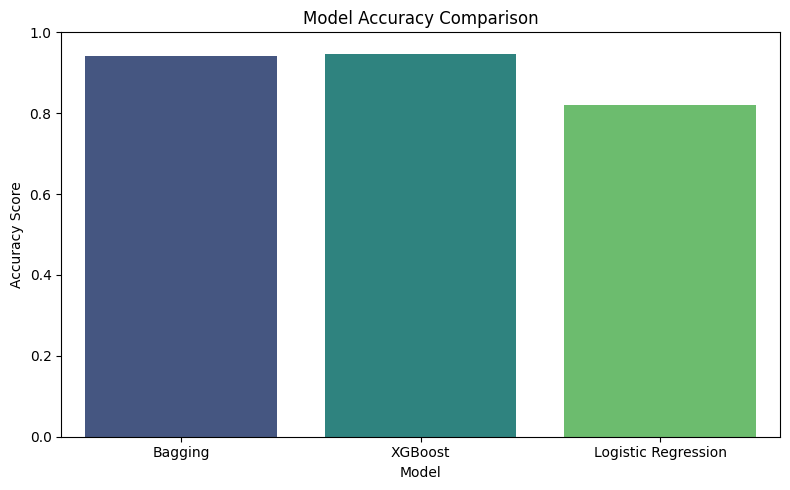

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store accuracies
accuracies = {
    'Bagging': accuracy_score(y_test, y_pred),           # y_pred from Bagging
    'XGBoost': accuracy_score(y_test, xgb_pred),
    'Logistic Regression': accuracy_score(y_test, logreg_pred)
}

# Convert to DataFrame
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', hue='Model', data=accuracy_df, palette='viridis', legend=False)

plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()


In [51]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib

# Step 2: Load the dataset
file_path = "C:/Users/acer/OneDrive/Desktop/Healthcare Insurance/Healthcare_Dataset_Preprocessed.csv"
df = pd.read_csv(file_path)

# Step 3: Prepare features and target
X = df.drop("Target", axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Recreate the model
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)

# Step 5: Save it as the best model
best_model = bagging_model
joblib.dump(best_model, 'best_health_model.pkl')
print("✅ Model saved successfully as 'best_health_model.pkl'")


✅ Model saved successfully as 'best_health_model.pkl'


In [52]:
import os
print(os.getcwd())


c:\Users\acer\OneDrive\Desktop\Healthcare Insurance\experiment


In [53]:
print(os.listdir())


['best_health_model.pkl', 'Dee.ipynb']


In [54]:
import joblib
joblib.dump(best_model, 'best_health_model.pkl')


['best_health_model.pkl']

In [55]:
loaded_model = joblib.load('best_health_model.pkl')
